# Report (README)

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
tcolors = {
    k.replace('tab:', ''): v
    for k, v in mcolors.TABLEAU_COLORS.items()
}

tcolors.keys()

dict_keys(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

In [3]:
COLORS = {
    'p3dresnet': [tcolors['green'], tcolors['purple']],
    'resnet50': [tcolors['blue'], tcolors['orange']],
}

def plot_vs_ref(solid, dash, dot=None):
    
    # colors
    train_color = {}
    valid_color = {}
    for line, case in [('solid', solid),
                       ('dash', dash),
                       ('dot', dot)]:
        if line == 'dot' and dot is None:
            continue
        if 'p3dresnet' in case:
            train_color[line] = COLORS['p3dresnet'][0]
            valid_color[line] = COLORS['p3dresnet'][1]
        else:
            train_color[line] = COLORS['resnet50'][0]
            valid_color[line] = COLORS['resnet50'][1]

    # plot
    plt.figure(figsize=[10, 3])
    
    # train
    plt.plot(logs[solid]['epoch'], logs[solid]['dice_coef'],
         color=train_color['solid'], linestyle='solid', label=solid)
    plt.plot(logs[dash]['epoch'], logs[dash]['dice_coef'],
         color=train_color['dash'], linestyle='dashed', label=dash)
    if dot is not None:
        plt.plot(logs[dot]['epoch'], logs[dot]['dice_coef'],
             color=train_color['dot'], linestyle='dotted', label=dot)
    # valid
    plt.plot(logs[solid]['epoch'], logs[solid]['val_dice_coef'],
         color=valid_color['solid'], linestyle='solid')
    plt.plot(logs[dash]['epoch'], logs[dash]['val_dice_coef'],
         color=valid_color['dash'], linestyle='dashed')
    if dot is not None:
        plt.plot(logs[dot]['epoch'], logs[dot]['val_dice_coef'],
             color=valid_color['dot'], linestyle='dotted')
    # settings
    #plt.title(f'{solid} vs {dash}')
    plt.legend(loc='upper left', facecolor='white', framealpha=1.0)
    plt.xlim(0., None)
    plt.ylim(0., 0.7)
    plt.grid(axis='y', color='lightgrey')

In [4]:
log_dir = Path('.')

In [5]:
list(log_dir.iterdir())

[PosixPath('identify-contrails_2023-08-02_00-37-23_log.csv'),
 PosixPath('identify-contrails_2023-07-28_21-28-24_log.csv'),
 PosixPath('identify-contrails_2023-07-31_17-55-47_log.csv'),
 PosixPath('identify-contrails_2023-07-28_21-26-12_log.csv'),
 PosixPath('identify-contrails_2023-07-30_10-32-45_log.csv'),
 PosixPath('identify-contrails_2023-07-25_00-58-50_log.csv'),
 PosixPath('identify-contrails_2023-08-04_08-34-43_log.csv'),
 PosixPath('identify-contrails_2023-08-05_09-23-45_log.csv'),
 PosixPath('identify-contrails_2023-08-05_00-12-06_log.csv'),
 PosixPath('identify-contrails_2023-08-03_22-59-02_log.csv'),
 PosixPath('identify-contrails_2023-07-28_19-34-15_log.csv'),
 PosixPath('identify-contrails_2023-07-31_14-40-32_log.csv'),
 PosixPath('identify-contrails_2023-08-04_01-36-29_log.csv'),
 PosixPath('identify-contrails_2023-07-24_21-10-06_log.csv'),
 PosixPath('identify-contrails_2023-07-24_22-38-16_log.csv'),
 PosixPath('identify-contrails_2023-08-04_17-20-21_log.csv'),
 PosixPa

## List of runs

In [6]:
logs = {}

# UNet BasicEncoder
logs['unet_no-augm'] = pd.read_csv(next(log_dir.glob('*08-03_22-57-47*')))  # v39
logs['unet_light-augm'] = pd.read_csv(next(log_dir.glob('*08-03_22-59-02*')))  # v40
logs['unet_full-augm'] = pd.read_csv(next(log_dir.glob('*08-04_08-34-43*')))  # v41

# UNet P3DResNet
logs['unet_light-augm_p3dresnet'] = pd.read_csv(next(log_dir.glob('*08-04_17-12-56*')))  # v42

# DeepLabV3+ ResNet50
logs['deeplab_resnet50_ref'] = pd.read_csv(next(log_dir.glob('*07-24_22-38-16*')))
logs['deeplab_resnet50_lr002'] = pd.read_csv(next(log_dir.glob('*07-25_00-58-50*')))
logs['deeplab_resnet50_dropout'] = pd.read_csv(next(log_dir.glob('*07-30_10-32-45*')))
logs['deeplab_resnet50_lr001_50ep'] = pd.read_csv(next(log_dir.glob('*07-31_08-06-27*')))
logs['deeplab_resnet50_lr002_25ep'] = pd.read_csv(next(log_dir.glob('*07-31_14-40-32*')))
logs['deeplab_resnet50_lr002_25ep_woaugm'] = pd.read_csv(next(log_dir.glob('*07-31_17-55-47*')))
logs['deeplab_resnet50_lr002_continued'] = pd.read_csv(next(log_dir.glob('*08-01_22-54-39*')))
logs['deeplab_resnet50_conti_no-augm'] = pd.read_csv(next(log_dir.glob('*08-02_18-58-12*')))
logs['deeplab_resnet50_conti_augm'] = pd.read_csv(next(log_dir.glob('*08-03_23-08-18*')))

# DeepLabV3+ P3DResNet
logs['deeplab_p3dresnet_ref'] = pd.read_csv(next(log_dir.glob('*07-29_16-03-20*')))
logs['deeplab_p3dresnet_lr002'] = pd.read_csv(next(log_dir.glob('*07-28_21-26-12*')))  # v32
logs['deeplab_p3dresnet_gradacc'] = pd.read_csv(next(log_dir.glob('*07-28_21-28-24*')))  # v33
logs['deeplab_p3dresnet_gradacc-lr002'] = pd.read_csv(next(log_dir.glob('*07-28_22-38-12*')))
logs['deeplab_p3dresnet_dropout'] = pd.read_csv(next(log_dir.glob('*07-29_21-28-43*')))
logs['deeplab_p3dresnet_lr001_50ep'] = pd.read_csv(next(log_dir.glob('*07-30_21-40-59*')))
logs['deeplab_p3dresnet_lr002_50ep_woaugm'] = pd.read_csv(next(log_dir.glob('*07-31_23-01-22*')))
logs['deeplab_p3dresnet_lr002_continued'] = pd.read_csv(next(log_dir.glob('*08-02_00-37-23*')))
logs['deeplab_p3dresnet_conti_no-augm'] = pd.read_csv(next(log_dir.glob('*08-02_19-50-23*')))
logs['deeplab_p3dresnet_conti_augm'] = pd.read_csv(next(log_dir.glob('*08-04_01-36-29*')))
logs['deeplab_p3dresnet_light-augm_conv3d'] = pd.read_csv(next(log_dir.glob('*08-04_17-20-21*')))  # v43
logs['deeplab_p3dresnet_light-augm_conv3d_frames-before_upsample'] = pd.read_csv(next(log_dir.glob('*08-05_00-12-06*')))
logs['deeplab_p3dresnet_light-augm_conv3d_frames-before'] = pd.read_csv(next(log_dir.glob('*08-05_09-23-45*')))

# shift epochs of continued runs
logs['deeplab_resnet50_lr002_continued']['epoch'] += 13
logs['deeplab_p3dresnet_lr002_continued']['epoch'] += 21
logs['deeplab_resnet50_conti_no-augm']['epoch'] += 32
logs['deeplab_p3dresnet_conti_no-augm']['epoch'] += 39
logs['deeplab_resnet50_conti_augm']['epoch'] += 32 + 10
logs['deeplab_p3dresnet_conti_augm']['epoch'] += 39 + 10

In [7]:
logs['deeplab_p3dresnet_ref'].columns

Index(['epoch', 'dice_coef', 'loss', 'lr', 'val_dice_coef', 'val_loss'], dtype='object')

## U-Net

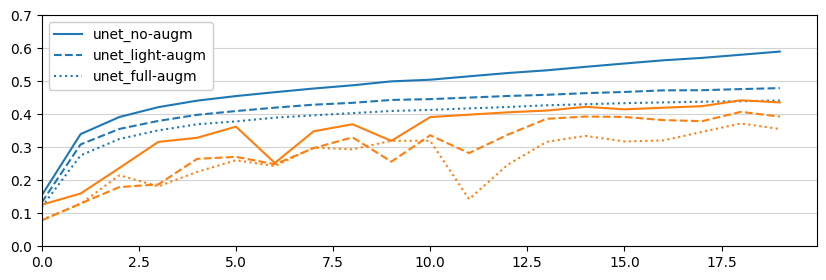

In [8]:
plot_vs_ref('unet_no-augm', 'unet_light-augm', 'unet_full-augm')

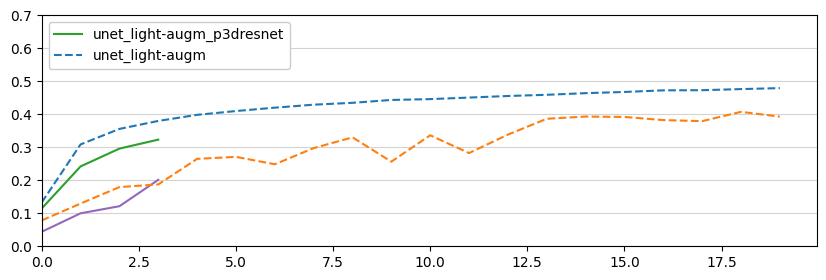

In [9]:
plot_vs_ref('unet_light-augm_p3dresnet', 'unet_light-augm')

## DeepLabV3+/ResNet50

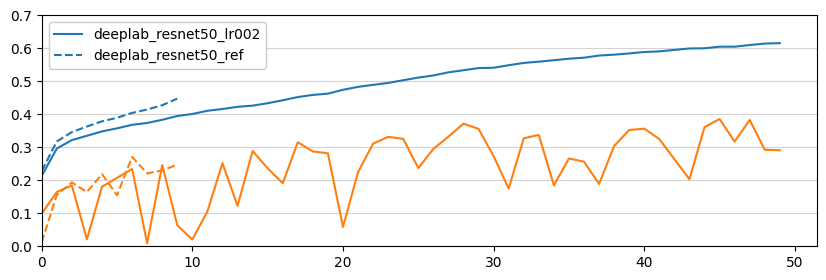

In [10]:
plot_vs_ref('deeplab_resnet50_lr002', 'deeplab_resnet50_ref')

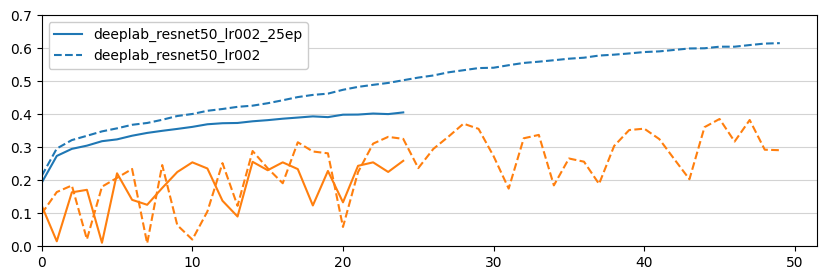

In [11]:
plot_vs_ref('deeplab_resnet50_lr002_25ep', 'deeplab_resnet50_lr002')

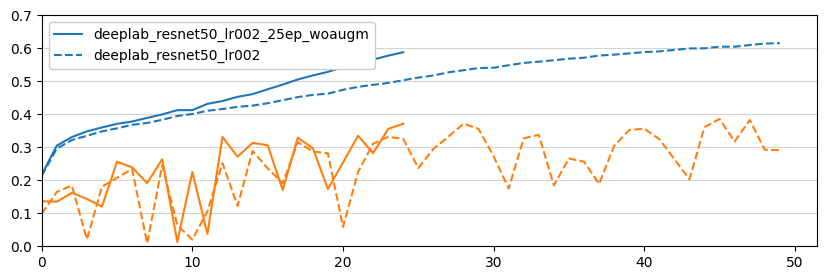

In [12]:
plot_vs_ref('deeplab_resnet50_lr002_25ep_woaugm', 'deeplab_resnet50_lr002')

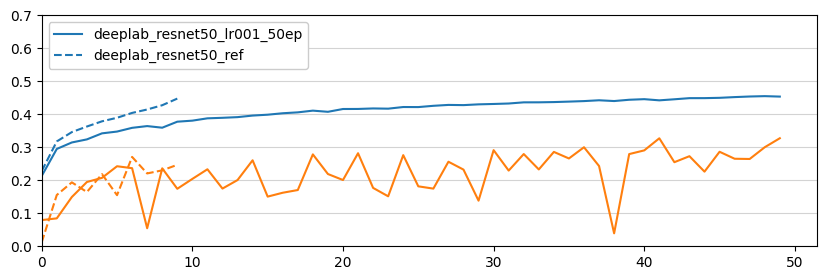

In [13]:
plot_vs_ref('deeplab_resnet50_lr001_50ep', 'deeplab_resnet50_ref')

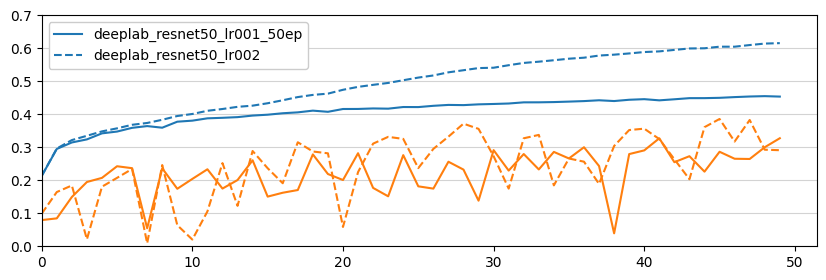

In [14]:
plot_vs_ref('deeplab_resnet50_lr001_50ep', 'deeplab_resnet50_lr002')

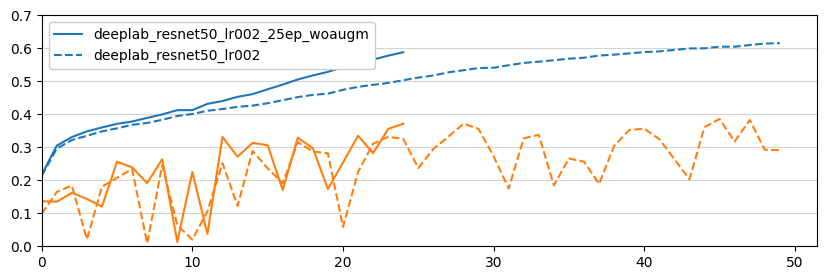

In [15]:
plot_vs_ref('deeplab_resnet50_lr002_25ep_woaugm', 'deeplab_resnet50_lr002')

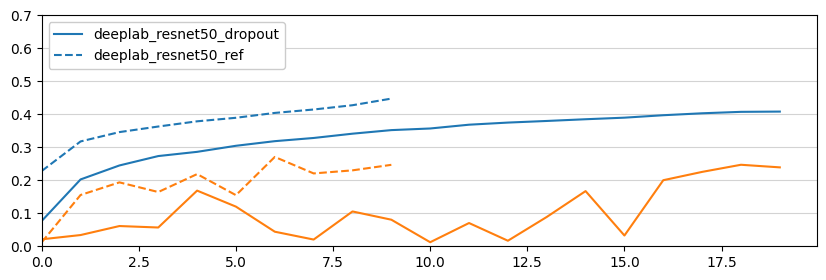

In [16]:
plot_vs_ref('deeplab_resnet50_dropout', 'deeplab_resnet50_ref')

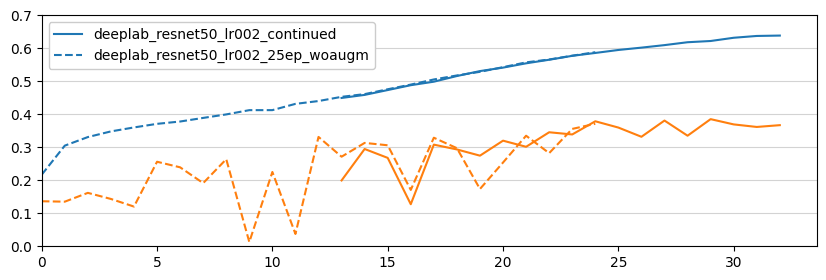

In [17]:
plot_vs_ref('deeplab_resnet50_lr002_continued', 'deeplab_resnet50_lr002_25ep_woaugm')

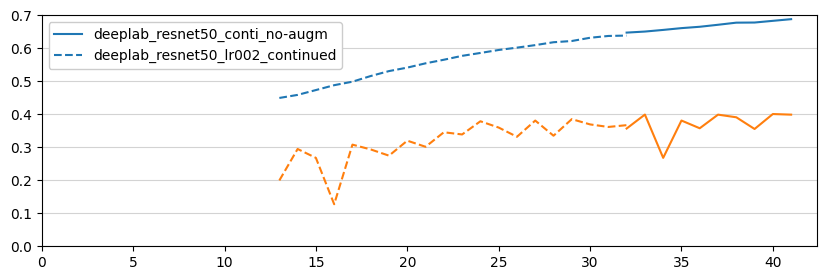

In [18]:
plot_vs_ref('deeplab_resnet50_conti_no-augm', 'deeplab_resnet50_lr002_continued')

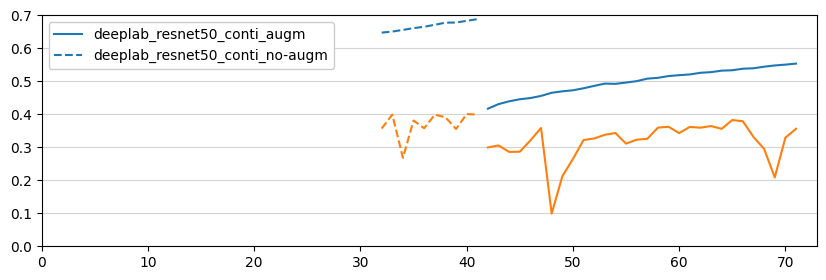

In [19]:
plot_vs_ref('deeplab_resnet50_conti_augm', 'deeplab_resnet50_conti_no-augm')

## DeepLabV3+/P3DResNet

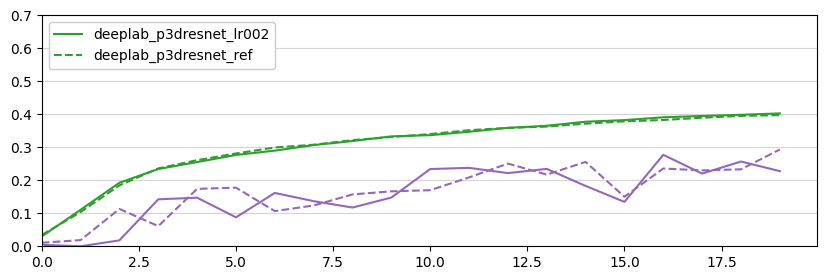

In [20]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_p3dresnet_ref')

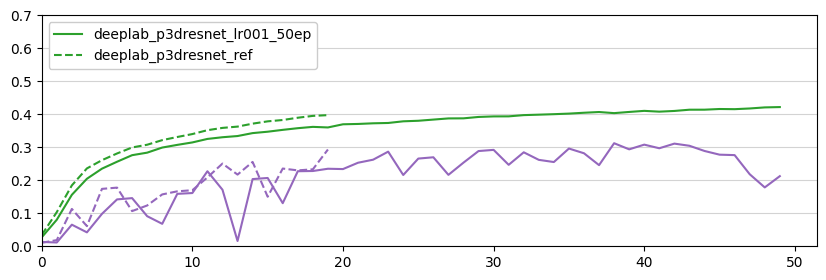

In [21]:
plot_vs_ref('deeplab_p3dresnet_lr001_50ep', 'deeplab_p3dresnet_ref')

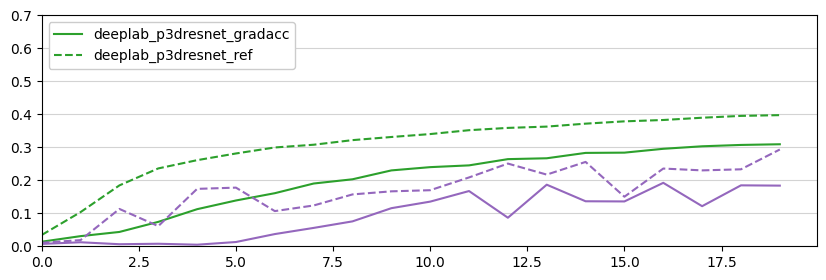

In [22]:
plot_vs_ref('deeplab_p3dresnet_gradacc', 'deeplab_p3dresnet_ref')

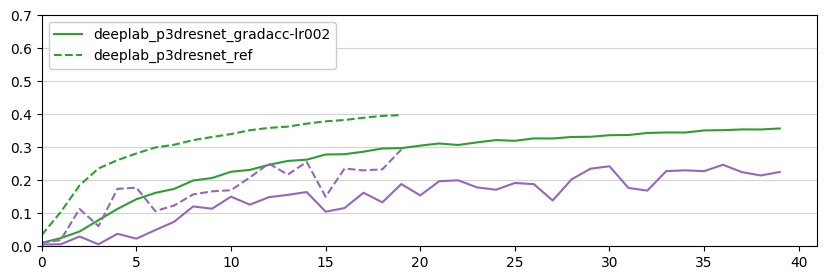

In [23]:
plot_vs_ref('deeplab_p3dresnet_gradacc-lr002', 'deeplab_p3dresnet_ref')

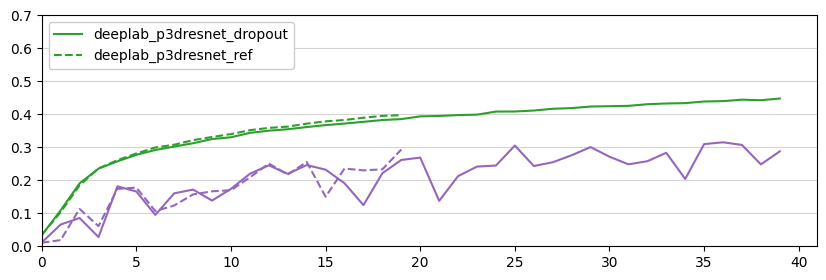

In [24]:
plot_vs_ref('deeplab_p3dresnet_dropout', 'deeplab_p3dresnet_ref')

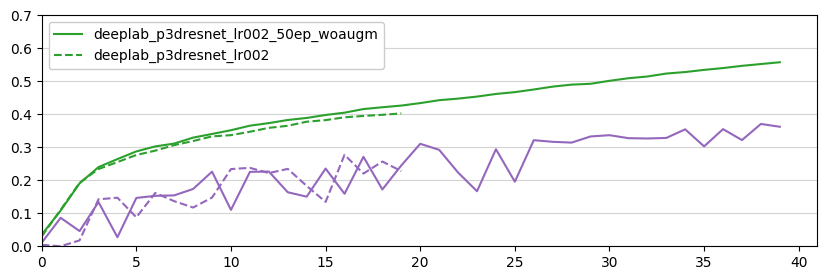

In [25]:
plot_vs_ref('deeplab_p3dresnet_lr002_50ep_woaugm', 'deeplab_p3dresnet_lr002')

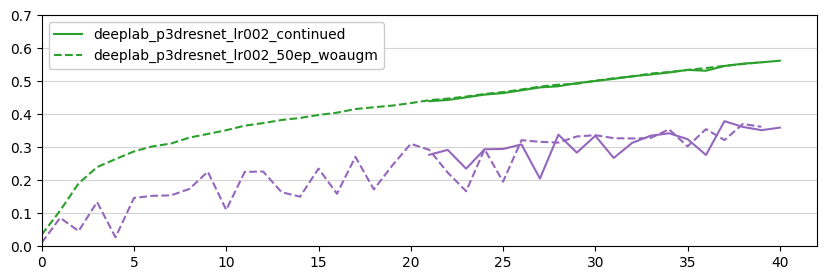

In [26]:
plot_vs_ref('deeplab_p3dresnet_lr002_continued', 'deeplab_p3dresnet_lr002_50ep_woaugm')

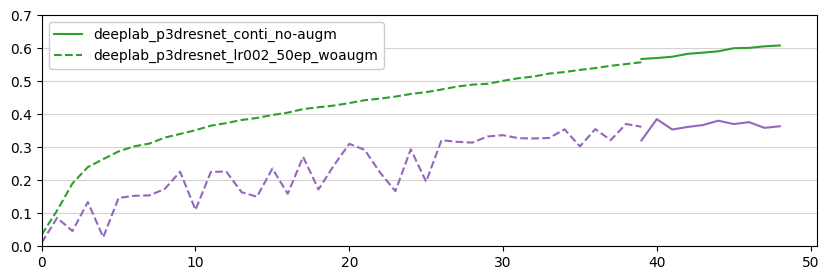

In [27]:
plot_vs_ref('deeplab_p3dresnet_conti_no-augm', 'deeplab_p3dresnet_lr002_50ep_woaugm')

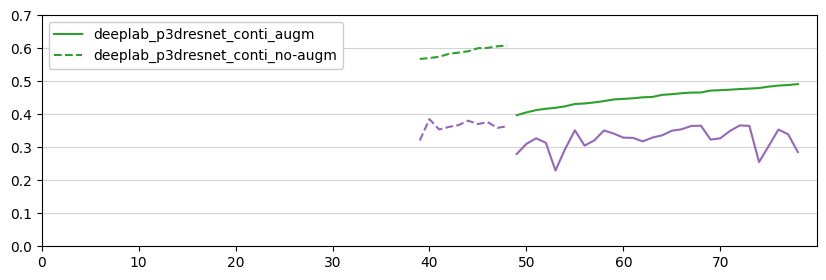

In [28]:
plot_vs_ref('deeplab_p3dresnet_conti_augm', 'deeplab_p3dresnet_conti_no-augm')

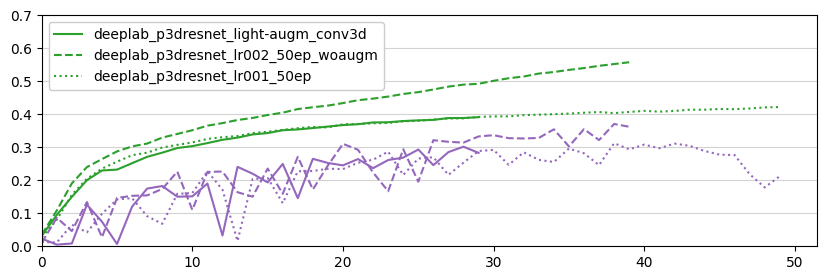

In [29]:
plot_vs_ref('deeplab_p3dresnet_light-augm_conv3d', 'deeplab_p3dresnet_lr002_50ep_woaugm',
           'deeplab_p3dresnet_lr001_50ep')

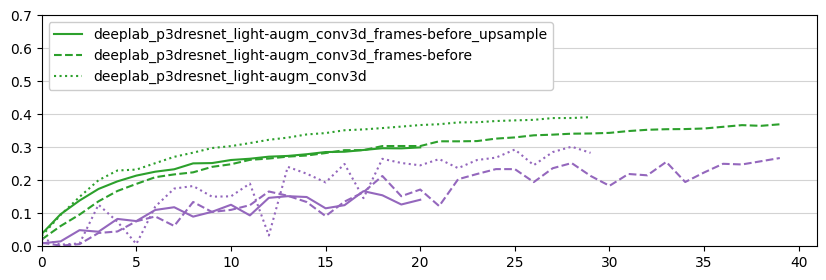

In [30]:
plot_vs_ref(
    'deeplab_p3dresnet_light-augm_conv3d_frames-before_upsample',
    'deeplab_p3dresnet_light-augm_conv3d_frames-before',
    'deeplab_p3dresnet_light-augm_conv3d')

## DeepLabV3+/P3DResNet vs ResNet50

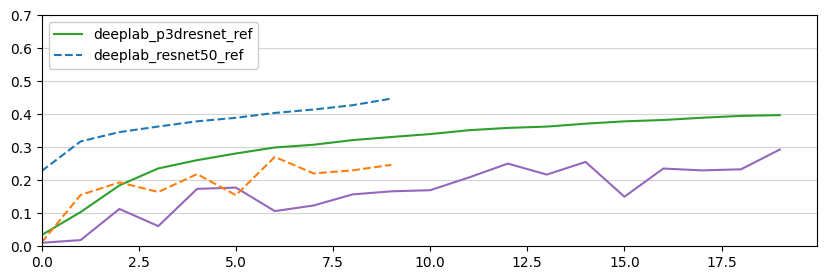

In [31]:
plot_vs_ref('deeplab_p3dresnet_ref', 'deeplab_resnet50_ref')

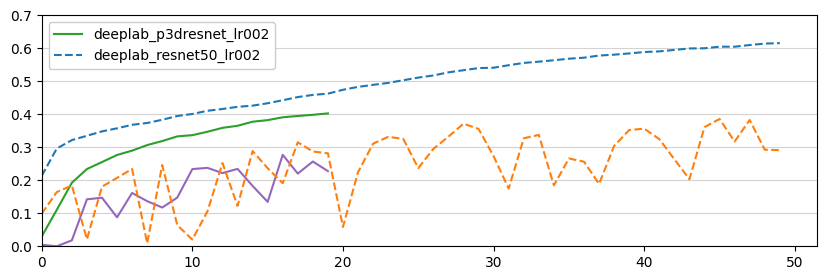

In [32]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_resnet50_lr002')

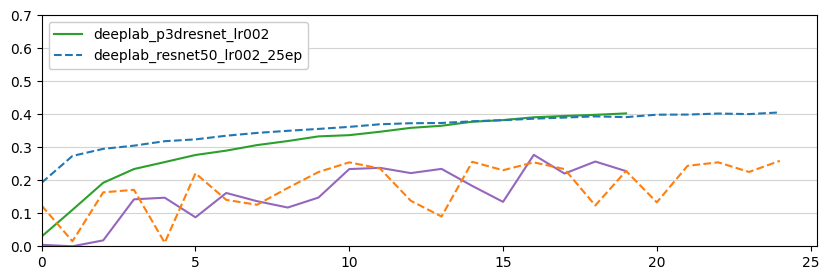

In [33]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_resnet50_lr002_25ep')

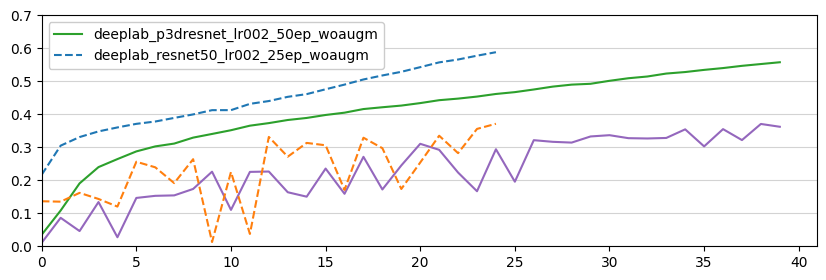

In [34]:
plot_vs_ref('deeplab_p3dresnet_lr002_50ep_woaugm', 'deeplab_resnet50_lr002_25ep_woaugm')

## DeepLabV3+ vs U-Net

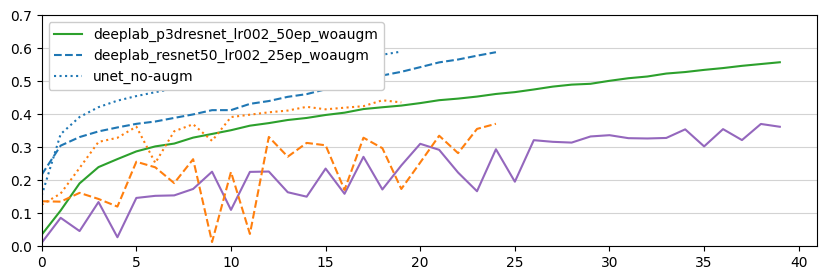

In [35]:
plot_vs_ref(
    'deeplab_p3dresnet_lr002_50ep_woaugm',
    'deeplab_resnet50_lr002_25ep_woaugm',
    'unet_no-augm')

## Training times

- `deeplab_resnet50`: 50 epochs in 4 h i.e. < **5 h**
- `deeplab_p3dresnet`: 50 epochs in 9 h i.e. < **10 h**